In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

points = [[0.2,0.8],[0.1,0.6],[0.15,0.71],[0.08,0.9],[0.16,0.85],[0.2,0.3],[0.25,0.5],[0.24,0.1],[0.3,0.2]]

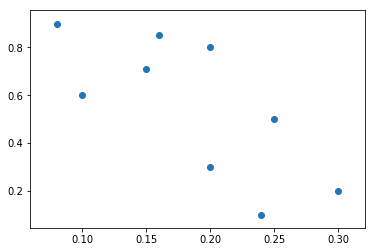

In [9]:
X = []
Y = []
for i in points:
    X.append(i[0])
    Y.append(i[1])
plt.scatter(X,Y)

In [18]:
class Kmeans:
    def __init__(self, k = 2, num_iter = 100):
        self.k = k
        self.num_iter = num_iter
        self.clusters = {}
        self.cluster_points = {}
        self.labels = []
    
    def get_distance(self, p, q):
        dist = 0
        for i in range(len(p)):
            dist+=(p[i]-q[i])**2
        return math.sqrt(dist)
    
    def fit(self, points):
        #initialize first K points as centroids
        for i in range(self.k):
            self.clusters[i] = points[i]
            
        self.labels = [-1]*len(points)
            
        while(self.num_iter>0):
            self.num_iter-=1
            
            for i in range(self.k):
                self.cluster_points[i] = []
            
            ind = 0
            for i in points:
                cluster_ind = -1
                minn = 999999999
                for j in self.clusters:
                    dist = self.get_distance(i, self.clusters[j])
                    if dist < minn:
                        minn = dist
                        cluster_ind = j
                self.cluster_points[cluster_ind].append(i)
                self.labels[ind] = cluster_ind
                ind+=1
                
            new_centroids = {}
            
            for i in self.clusters:
                new_point = [0]*len(points[0])
                for j in self.cluster_points[i]:
                    for p in range(len(j)):
                        new_point[p]+=j[p]
                if len(self.cluster_points[i])>0:
                    for j in range(len(new_point)):
                        new_point[j] = new_point[j]/len(self.cluster_points[i])
                new_centroids[i] = new_point
            
            if self.num_iter>0:
                self.clusters = new_centroids
#             print(self.clusters)        

Cluster points are: 
[0.138, 0.772]
[0.2475, 0.275]


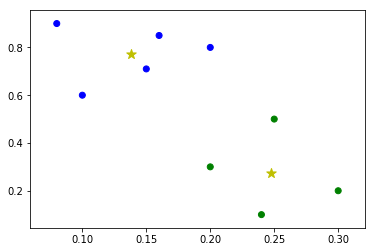

In [30]:
km = Kmeans(k=2,num_iter=100)
km.fit(points)
my_color = []
color_arr = ['b','g','y','orange']
for i in range(len(km.labels)):
    my_color.append(color_arr[km.labels[i]])

cluster_center = km.clusters
print("Cluster points are: ")
for i in cluster_center:
    print(cluster_center[i])
cluster_x = []
cluster_y = []
for i in cluster_center:
    cluster_x.append(cluster_center[i][0])
    cluster_y.append(cluster_center[i][1])
plt.scatter(X,Y,color = my_color)
plt.scatter(cluster_x,cluster_y,color="y",marker="*",s=100)

Cluster points are: 
[0.138 0.772]
[0.2475 0.275 ]


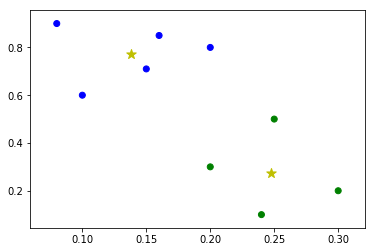

In [31]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(points)
my_color = []
color_arr = ['b','g','y','orange']
for i in range(len(km.labels_)):
    my_color.append(color_arr[km.labels_[i]])

cluster_center = km.cluster_centers_
print("Cluster points are: ")
for i in cluster_center:
    print(i)
cluster_x = []
cluster_y = []
for i in cluster_center:
    cluster_x.append(i[0])
    cluster_y.append(i[1])
plt.scatter(X,Y,color = my_color)
plt.scatter(cluster_x,cluster_y,color="y",marker="*",s=100)